# 6. Construyendo tu Primera Red Neuronal con Keras
En esta capítulo se guiará al lector a través del proceso de construcción de su primera red neuronal utilizando la biblioteca Keras. Se explicará cómo cargar y preprocesar conjuntos de datos, construir una arquitectura de red neuronal básica, compilar el modelo y ajustar los datos. Se utilizará el ejemplo de reconocimiento de dígitos utilizando el conjunto de datos FASHION_MNIST.

## 6.1. Carga del conjuntos de datos

El primer paso para construir una red neuronal es obtener los datos con los que entrenaremos a nuestro modelo. En este caso, utilizaremos el conjunto de datos llamado FASHION_MNIST, que contiene imágenes de distintos artículos de moda, como camisetas, pantalones y zapatillas, y es muy popular en el mundo del aprendizaje profundo.

### Conceptos clave

#### Conjunto de datos
Un conjunto de datos es una colección de datos que se utiliza para el entrenamiento, la validación y las pruebas de un modelo. Este conjunto de datos puede ser una mezcla de datos etiquetados y sin etiquetar, y suelen ser necesarios para el entrenamiento supervisado.

**Ejemplo:** Supongamos que estás aprendiendo a cocinar. Tus "datos" serían las recetas que sigues, y la "etiqueta" sería el plato resultante. Así, si tienes una foto del plato final y las instrucciones para cocinarlo, tienes una pieza de "datos etiquetados".

Para cargar y preprocesar los datos, utilizaremos el siguiente código:

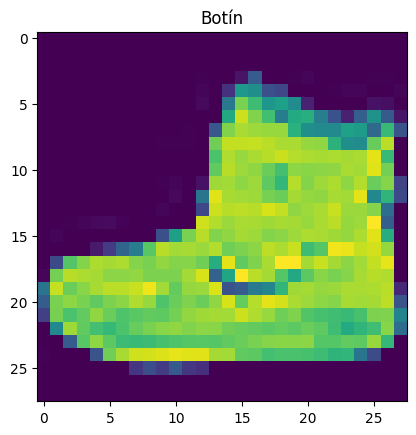

In [1]:
from keras.datasets import fashion_mnist

# Cargamos los datos de Fashion MNIST
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# Lista de categorías en el conjunto de datos Fashion MNIST
fashion_mnist_labels = ["Camiseta/top",  # index 0
                        "Pantalón",      # index 1
                        "Suéter",        # index 2
                        "Vestido",       # index 3 
                        "Abrigo",        # index 4
                        "Sandalia",      # index 5
                        "Camisa",        # index 6 
                        "Zapatilla",     # index 7
                        "Bolso",         # index 8 
                        "Botín"]         # index 9

import matplotlib.pyplot as plt

# Muestra la primera imagen en los datos de entrenamiento
plt.imshow(train_data[0])
plt.title(fashion_mnist_labels[train_labels[0]])
plt.show()

## 6.2. Construcción de una arquitectura de red neuronal básica

En esta sección, nos centraremos en construir la arquitectura de nuestra red neuronal utilizando Keras. Una red neuronal consiste en una serie de capas, cada una de las cuales tiene múltiples neuronas (nodos). Las capas se conectan entre sí a través de "pesos", que son los parámetros que la red aprende durante el entrenamiento.

En Keras, la arquitectura de la red se define como una secuencia de capas, que es lo que se conoce como un modelo secuencial.

Vamos a construir un modelo simple para ejemplificar:

In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

Este modelo tiene dos capas. La primera capa es una capa oculta con 512 nodos y la segunda es la capa de salida con 10 nodos. El parámetro `input_shape` en la primera capa define implícitamente nuestra capa de entrada. En este caso, estamos diciendo que cada entrada a la red es un vector de longitud 28*28 (784), lo cual podría representar, por ejemplo, una imagen en escala de grises de 28x28 píxeles aplanada en un vector.

En cuanto a las funciones de activación:

### Función de activación ReLU

La función de activación ReLU (Rectified Linear Unit) es una de las más utilizadas en las capas ocultas de las redes neuronales. Tiene la ventaja de ser capaz de manejar no linealidades, lo cual es esencial para resolver problemas complejos.

**Ejemplo:** Imagina que estás tratando de predecir la probabilidad de que llueva en función de una serie de variables como la temperatura, la presión atmosférica y la humedad. Esta es una relación inherentemente no lineal - por ejemplo, la probabilidad de lluvia podría aumentar con la humedad hasta cierto punto, pero luego disminuir si la humedad se vuelve demasiado alta. En este caso, la función ReLU sería útil porque podría capturar estas no linealidades.

### Función de activación Softmax

La función de activación 'softmax', por otro lado, es comúnmente utilizada en la capa de salida de las redes neuronales que se utilizan para tareas de clasificación multiclase. 'Softmax' transforma las salidas de la red en probabilidades que suman 1. En otras palabras, cada nodo en la capa de salida proporciona la probabilidad de que la entrada pertenezca a una clase específica.

**Ejemplo:** Si estás construyendo una red neuronal para reconocer dígitos escritos a mano, la capa de salida podría tener 10 nodos (uno para cada dígito del 0 al 9). El nodo con la salida más alta indicaría el dígito que la red predice.

Por último, es importante mencionar que la elección de la función de activación puede variar dependiendo del tipo de problema y de la naturaleza de los datos. Por ejemplo, para problemas de regresión, es común usar la función de activación lineal en la capa de salida. Y en algunos casos, otras funciones de activación como tanh o sigmoid podrían ser más apropiadas para las capas ocultas.

## 6.3. Ajuste de datos

Ahora que tenemos nuestros datos y hemos definido nuestra red, el siguiente paso es ajustar los datos de entrada. En este paso, aprenderás a normalizar los datos para mejorar el rendimiento del modelo.

### Conceptos clave

#### Ajuste de datos
El ajuste de datos es el proceso de preparar los datos de entrada para el modelo. Esto puede incluir la normalización de los datos, la codificación de las etiquetas, la división de los datos en conjuntos de entrenamiento y prueba, entre otros.

**Ejemplo:** Volviendo al ejemplo de aprender a cocinar, ajustar los datos sería como preparar tus ingredientes antes de comenzar a cocinar. Esto podría incluir lavar las verduras, cortar los ingredientes en el tamaño correcto, etc.

Para ajustar nuestros datos, utilizaremos el siguiente código:

In [3]:
# Revisamos la forma inicial de los datos
print('Forma de los datos de entrenamiento antes del preprocesamiento:', train_data.shape)

# Cambiamos la forma de los datos para que puedan ser introducidos en nuestra red neuronal
train_data = train_data.reshape([60000, 28*28])
test_data = test_data.reshape([10000, 28*28])

print('Forma de los datos de entrenamiento después del preprocesamiento:', train_data.shape)

# Normalizamos los datos de entrada
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# Codificamos nuestras etiquetas de categoría en vectores binarios
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Forma de los datos de entrenamiento antes del preprocesamiento: (60000, 28, 28)
Forma de los datos de entrenamiento después del preprocesamiento: (60000, 784)


# 7. Entrenando y Evaluando el Modelo de tu Red Neuronal
En este capítulo se enseñará cómo entrenar y evaluar el modelo de una red neuronal utilizando los datos de entrenamiento y prueba. Se explicará cómo entrenar el modelo con los datos de entrenamiento, y evaluar la precisión del modelo utilizando los datos de prueba.

## 7.1. Entrenamiento del modelo con los datos de entrenamiento

El entrenamiento es donde alimentamos nuestros datos de entrenamiento al modelo. En este proceso, el modelo intenta aprender patrones útiles en los datos de entrenamiento que le permitirán realizar la tarea en cuestión, como la clasificación de imágenes.

### Conceptos clave

#### Hiperparámetros, Función de pérdida y Optimizador

Los hiperparámetros son los parámetros que definimos antes de entrenar el modelo. Estos incluyen el número de épocas (iteraciones completas a través de los datos de entrenamiento), la tasa de aprendizaje (qué tan rápido el modelo aprende), el tamaño del lote (número de muestras de entrenamiento utilizadas en una iteración), entre otros.

La función de pérdida es una forma de medir cuán bien se desempeña el modelo en los datos de entrenamiento. Deseamos minimizar esta función para "guiar" el modelo en la dirección correcta.

El optimizador es el algoritmo que utilizamos para minimizar la función de pérdida. Este algoritmo realiza pequeños ajustes a los pesos y sesgos de la red para mejorar su rendimiento.

**Ejemplo:** Puedes imaginar el entrenamiento del modelo como el proceso de aprender a lanzar dardos. Al principio, tus lanzamientos pueden no acertar en el objetivo (alta función de pérdida). Sin embargo, con práctica y ajuste, puedes mejorar tu puntería (minimizar la función de pérdida con un optimizador).

### Ajuste de los hiperparámetros

Los hiperparámetros son parámetros ajustables que determinan la estrategia de aprendizaje del algoritmo. Por ejemplo, durante el entrenamiento de una red neuronal, podríamos ajustar hiperparámetros como el número de capas en la red, el número de nodos en cada capa, el tipo de optimizador, la tasa de aprendizaje del optimizador, y otros.

Ajustar estos hiperparámetros puede tener un gran impacto en el rendimiento de la red neuronal. Sin embargo, encontrar la combinación correcta de hiperparámetros puede ser un desafío. A menudo, los ingenieros de aprendizaje automático realizarán una "búsqueda de cuadrícula" o una "búsqueda aleatoria" para encontrar la mejor combinación de hiperparámetros.

Entonces, procedamos a entrenar nuestro modelo y ajustar los hiperparámetros utilizando el siguiente código:

In [4]:
from keras.optimizers import RMSprop

# Definimos los hiperparámetros
epochs = 10
batch_size = 128
learning_rate = 0.01

# Configuramos el optimizador con la tasa de aprendizaje
optimizer = RMSprop(learning_rate=learning_rate)

# Definimos el optimizador, la función de pérdida y las métricas que queremos rastrear
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(train_data, train_labels, 
                    epochs=epochs, 
                    batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 11s 20ms/step - loss: 0.9038 - accuracy: 0.7689
Epoch 2/10
469/469 [==============================] - 10s 20ms/step - loss: 0.4610 - accuracy: 0.8387
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.4209 - accuracy: 0.8537
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.4013 - accuracy: 0.8618
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3969 - accuracy: 0.8669
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3781 - accuracy: 0.8717
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3748 - accuracy: 0.8753
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3671 - accuracy: 0.8766
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3666 - accuracy: 0.8797
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3569 - accu

En este ejemplo, hemos definido el número de épocas, el tamaño del lote y la tasa de aprendizaje como nuestros hiperparámetros. Ajustamos la tasa de aprendizaje del optimizador antes de pasarla a la función `compile`. Luego entrenamos el modelo con el método `fit` y guardamos la historia de entrenamiento para futuras referencias.

## 7.2. Evaluación de la precisión del modelo con los datos de prueba

La evaluación del modelo nos permite medir el rendimiento de nuestro modelo entrenado en un conjunto de datos independiente, conocido como datos de prueba. Durante esta fase, hacemos predicciones con nuestro modelo y luego las comparamos con las etiquetas reales para determinar la precisión de nuestras predicciones. 

Además, utilizamos diversas métricas de evaluación para obtener una comprensión más detallada del rendimiento de nuestro modelo.

### Predicciones del modelo
Para realizar predicciones con nuestro modelo, usamos el método `predict()` del modelo. Este método toma una entrada (en nuestro caso, los datos de prueba) y produce una salida (las predicciones).

In [5]:
# Realizando predicciones
predictions = model.predict(test_data)

313/313 [==============================] - 1s 4ms/step


Cada entrada en 'predictions' es un vector de longitud 10 (asumiendo que estamos clasificando imágenes en 10 clases). El índice con el valor más alto es la clase predicha por el modelo.

### Comparando con las etiquetas reales
Para ver cuán bien se desempeña nuestro modelo, debemos comparar nuestras predicciones con las etiquetas reales. Esto se puede hacer manualmente, o podemos usar la función `argmax()` de NumPy para obtener los índices de las clases predichas y luego compararlos con las etiquetas reales.

In [6]:
import numpy as np

# Convertir las predicciones a etiquetas
predicted_labels = np.argmax(predictions, axis=1)

# Convertir las etiquetas de prueba de one-hot a clases
test_labels_classes = np.argmax(test_labels, axis=1)

# Comparando con las etiquetas reales
accuracy = np.sum(predicted_labels == test_labels_classes) / len(test_labels_classes)
print('Test accuracy:', accuracy)

Test accuracy: 0.8575


### Métricas de evaluación
Además de la precisión, que simplemente cuenta el porcentaje de clasificaciones correctas, hay otras métricas de evaluación que pueden proporcionarnos más información sobre el rendimiento del modelo. Estas incluyen la precisión (qué proporción de identificaciones positivas fue realmente correcta), el recall (qué proporción de positivos reales se identificó correctamente), la puntuación F1 (una combinación de precisión y recall) y la curva ROC (una representación gráfica del rendimiento del clasificador).

In [7]:
from sklearn.metrics import classification_report

# Convertir las etiquetas de prueba de one-hot a clases
test_labels_classes = np.argmax(test_labels, axis=1)

# Imprimir el informe de clasificación
print(classification_report(test_labels_classes, predicted_labels))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.72      0.75      1000
           3       0.78      0.93      0.85      1000
           4       0.82      0.69      0.75      1000
           5       0.98      0.92      0.95      1000
           6       0.61      0.67      0.64      1000
           7       0.92      0.96      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Este informe de clasificación nos dará una visión detallada de cómo se desempeña nuestro modelo en cada clase individualmente, lo que puede ser útil para identificar clases problemáticas que podrían beneficiarse de más datos de entrenamiento o de un ajuste de los hiperparámetros.

### Evaluando el modelo
La evaluación del modelo es un paso fundamental después de entrenar nuestro modelo. Para ello, usamos el método `evaluate()` del modelo. Esta función devolverá la pérdida del modelo y las métricas de evaluación calculadas para el conjunto de datos de prueba.

In [8]:
# Evaluación del modelo
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.5200059413909912
Test accuracy: 0.8575000166893005


En este caso, la pérdida (loss) nos da una medida de cuán incorrectas fueron las predicciones del modelo en promedio, mientras que la precisión (accuracy) nos indica la proporción de imágenes que fueron clasificadas correctamente. Asegúrate de tener en cuenta tanto la pérdida como la precisión al evaluar el rendimiento de tu modelo.